# Automatizovaná detekce rotace DH PSF

In [1]:
from PSFrot import PSFrot
import proplot as pplt
import numpy as np 
from skimage.draw import circle_perimeter
from skimage.color import rgb2gray, gray2rgb

TypeError: 'float' object cannot be interpreted as an integer

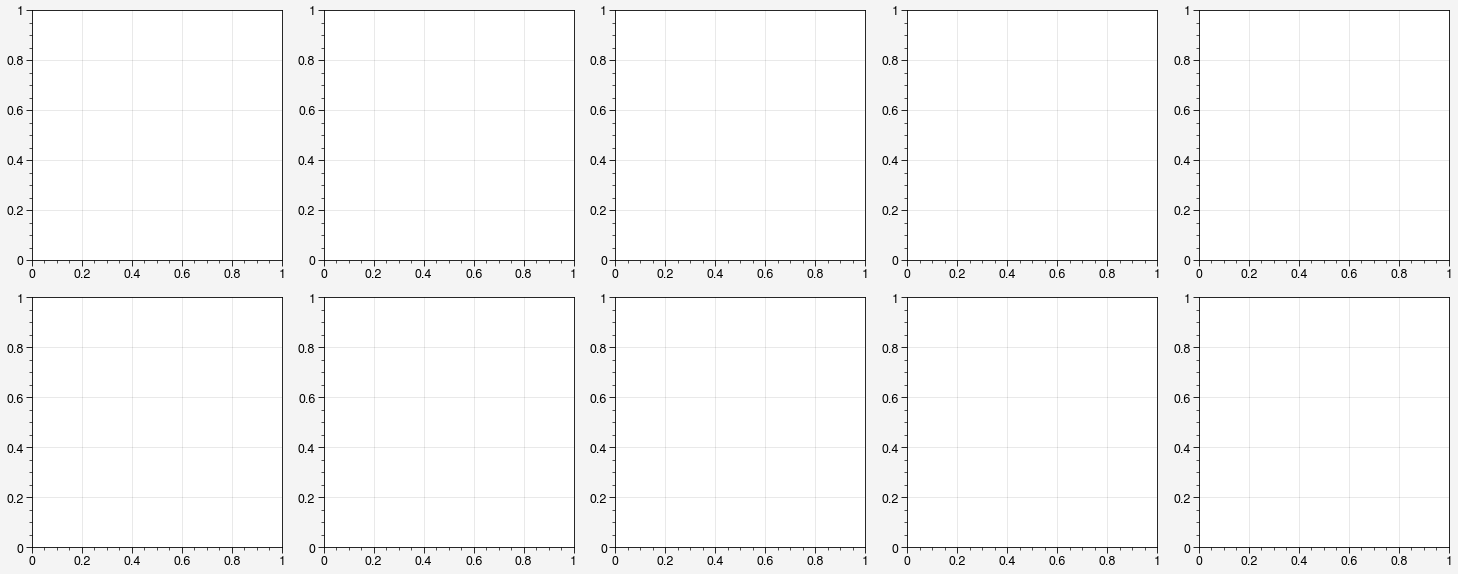

In [7]:
fig, axs = pplt.subplots(nrows=2, ncols=5, share=False)

angles = np.zeros(10)

for i in range(-5, 5):
    filename = "test_imgs/" + str(i) + ".tiff"
    image = PSFrot.readImage(path=filename)
    image = PSFrot.threshold(image, intensity=0.4)
    cx, cy, rad = PSFrot.findCircles(image)
    imC = gray2rgb(image)
    print(np.rad2deg(np.arctan2(cy[1] - cy[0], cx[1] - cx[0])))
    for cx, cy in zip(cx, cy):
        imC[cy, cx] = (0, 1., 0)
    axs[i//5, 4-i % 5].imshow(imC)
    axs[i//5, 4-i % 5].format(title=str(i) + "um")

fig.save("vysl.png", dpi=333)


## little speed test

Just want to ensure that RPi would handle the image fast enough.

In [4]:
i = 0
filename = "test_imgs/" + str(i) + ".tiff"
image = PSFrot.readImage(path=filename)
image = PSFrot.threshold(image, intensity=0.4)
PSFrot.findCircles(image)

(array([46, 50]), array([58, 49]), array([4, 2]))